In [20]:
%matplotlib inline
import numpy as np
from desc.grid import Grid, LinearGrid
from desc.equilibrium import Equilibrium
from desc.geometry import FourierRZToroidalSurface
from desc.objectives import (
    ObjectiveFunction,
    CurrentDensity,
    get_fixed_boundary_constraints,
)
from desc.optimize import Optimizer
from desc.plotting import plot_1d, plot_section, plot_surfaces
from desc.profiles import PowerSeriesProfile

In [21]:
surface_2D = FourierRZToroidalSurface(
    R_lmn=np.array([10, -1]),  # boundary coefficients
    #Z_lmn=np.array([1]),
    #modes_Z=np.array([[-1, 0]]),
    Z_lmn = np.array([0, -1]),
    modes_R=np.array([[0, 0], [1, 0]]),  # [M, N] boundary Fourier modes
    modes_Z = np.array([[0, 0], [-1, 0]]),

    NFP=1,  # number of (toroidal) field periods
)

In [22]:
iota = PowerSeriesProfile(modes=np.array([0]), params=np.array([0]))
# axisymmetric & stellarator symmetric equilibrium
eq = Equilibrium(iota=iota, surface=surface_2D, sym=True)
eq.change_resolution(L=6, M=6, L_grid=12, M_grid=12)

objective = ObjectiveFunction(CurrentDensity())

constraints = get_fixed_boundary_constraints(profiles=False)
optimizer = Optimizer("lsq-exact")
eq, solver_outputs = eq.solve(
    objective=objective, constraints=constraints, optimizer=optimizer, verbose=3
)

/usr/local/lib/python3.10/dist-packages/desc_opt-0+untagged.5332.g4cefce1.dirty-py3.10.egg/desc/objectives/objective_funs.py:816: FutureWarning: Creating an Objective without specifying the Equilibrium to optimize is deprecated, in the future this will raise an error.
  warnings.warn(


Building objective: current density
Precomputing transforms
Timer: Precomputing transforms = 372 ms
Timer: Objective build = 587 ms
Timer: Linear constraint projection build = 1.40 sec
Compiling objective function and derivatives: ['current density']
Timer: Objective compilation time = 985 ms
Timer: Jacobian compilation time = 2.50 sec
Timer: Total compilation time = 3.49 sec
Number of parameters: 31
Number of objectives: 147
Starting optimization
Using method: lsq-exact
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1          2.203e-02                                    1.144e+00   
       1              4          1.223e-03      2.080e-02      1.897e-01      8.616e-01   
       2              5          5.402e-06      1.217e-03      5.583e-02      8.087e-02   
       3              6          3.512e-07      5.051e-06      2.018e-02      1.124e-02   
       4              8          1.971e-08      3.314e-07      2.648e

(<Figure size 384x480 with 1 Axes>,
 array([<AxesSubplot: title={'center': '$\\phi \\cdot NFP/2\\pi = 0.000$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>],
       dtype=object))

/home/joaobiu/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


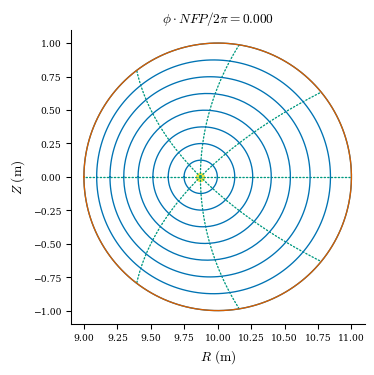

In [23]:
grid = LinearGrid(rho = np.sqrt(1), M = 20, N = 20, NFP = eq.NFP)

plot_surfaces(eq)

In [25]:
eq.save("equilibria/output_torus.h5")